In [321]:
# Herzlich willkommen zu der Clusteringanalyse des "Credit Card Datasets", 
# einem Datenbestand mit Kreditkartendetails von Kunden eines imaginären Unternehmens. Das Dataset haben wir von 
# https://www.kaggle.com/arjunbhasin2013/ccdata.
# Dieses Dokument ist ein kleines add on zu der Folge "CLUSTERING" von The Erium Podcast.
# Solltet ihr die Folge noch nicht gehört haben, tut das am besten direkt unter theeriumpodcast.de, auf Spotify oder 
# Apple Podcasts. So wird deutlicher was gleich hier passiert.
# Aber nun genug davon und ran an die Analyse.
# Zunächst importieren wir die nötigen Bibliotheken für unser Preprocessing und die Analyse.

import numpy as np 
import pandas as pd 


from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import pdist
from sklearn import preprocessing

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [322]:
# Nun lesen wir die CSV-Datei ein und verschaffen uns einen ersten Überblick über den Dataframe.
df = pd.read_csv('CC GENERAL.csv')
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [323]:
# Unser Dataframe hat 18 Spalten, von denen die erste völlig redundant ist. Wir werden sie direkt entfernen.
df = df.drop(['CUST_ID'], axis=1)
# Danach folgen Features wie der Kontostand, wie oft dieser geupdated wird und wie oft den eingekauft wird. Es ibt sogar Informationen über Käufe in Raten, mit Anzahlung und so weiter.
# Eine sehr wichtige Information ist die Anzal der Zeilen.
df.shape

(8950, 17)

In [324]:
# Unser Datenbestand hat 8950 Zeilen. 
# Ähnlich wie in der letzten Jupyter Notebook Datei schauen wir uns noch die Missing Values an...
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS                    8637 non-null float64
PRC_FULL_PAYMENT           

In [325]:
# ...und entscheiden uns in diesem Fall, da der Anteil der Missing Values sehr gering ist, die fehlenden Einträge mit dem
# am häufigsten auftretenden Wert in der jeweiligen Spalte zu füllen. 
df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [326]:
# Schauen wir uns den Datenbestand nochmal an.
df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000        299.351881          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [327]:
# Für unsere Clusteringanalyse ist es besonders wichtig, dass unsere Daten passend skaliert sind, könnten bei Algorithmen wie 
# KMeans völlig unsinnige Cluster entstehen. Hierfür verwenden wir den sogenannten "MinMaxScaler", 
# um die Größenskalen anzupassen.
v = df.values
min_max_scaler = preprocessing.MinMaxScaler()
v = min_max_scaler.fit_transform(v)
df = pd.DataFrame(v,columns=df.columns)

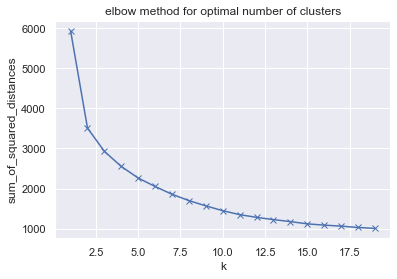

In [329]:
# Beginnen wir nun mit dem Clustering. Zunächst verwenden wir KMeans, welcher als Input die Anzahl der Cluster braucht.
# Um diese Anzahl herauszufinden, verwenden wir die sogenannte "Elbow-Method". Dabei gehen wir ein natürliche Zahlen, 
# die als Cluster in Frage kommen durch und berechnen dazu die Summe der quadratischen Abstände von Datenpunkten zu
# ihrem Cluster Zentrum. Letzteres wollen wir möglichst gering halten, aber nicht zu gering (beispielsweise würde eine
# Clusteranzahl von 1000000 sehr nahe an die Null gehen lassen, ist aber vermutlich keine gute Wahl hier). Wir möchten
# dementsprechend also die Clusteranzahl finden, ab welcher sich diese Abstand nicht mehr drastisch verkleinern. 
# Dazu schauen wir uns folgenden Graphen an:

sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(df)
    sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal number of clusters')
plt.show()

In [330]:
# Etwas im Bereich 8 bis 10 scheint eine gute Wahl zu sein. Wir entscheiden uns für die 8. 
# Im Folgenden machen wir nun die Anaylse mit KMeans und 8 Clustern. Anschließend fügen wir, den zu jedem Datenpunkt 
# gefundenen Cluster als neues Feature unserem Dataframe hinzu.
df_KMeans = df.copy()
kmeans = KMeans(n_clusters=8, random_state=0).fit(df)
df_KMeans['Cluster'] = kmeans.labels_

In [331]:
# Es folgt nun die Analyse. Bei der wir uns für dieses Mal nur ein paar Features anschauen, um die Übersicht behalten zu können.
# Die folgende Tabelle zeigt uns den Mittel der einzelnen Cluster in der jeweiligen Spalte.

df_KMeans_summary = df_KMeans.groupby(by='Cluster').mean()
df_KMeans_summary = df_KMeans_summary[['BALANCE', 
                                       'PURCHASES',
                                       'PURCHASES_FREQUENCY',
                                       'CREDIT_LIMIT', 
                                       'ONEOFF_PURCHASES_FREQUENCY', 
                                       'MINIMUM_PAYMENTS','PRC_FULL_PAYMENT', 
                                       'PAYMENTS']]
df_KMeans_summary

BALANCE  PURCHASES  PURCHASES_FREQUENCY  CREDIT_LIMIT  \
Cluster                                                           
0        0.120052   0.003670             0.070269      0.140915   
1        0.077007   0.022134             0.945764      0.125874   
2        0.071821   0.042036             0.845086      0.194114   
3        0.007687   0.006627             0.161274      0.132292   
4        0.006302   0.023550             0.868944      0.132927   
5        0.084104   0.016712             0.531403      0.144874   
6        0.070786   0.006020             0.186194      0.103903   
7        0.133101   0.090213             0.975346      0.252330   

         ONEOFF_PURCHASES_FREQUENCY  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
Cluster                                                                   
0                          0.055675          0.014388          0.020723   
1                          0.091588          0.016119          0.059844   
2                          0.822702          0.007663          0.301256   
3                          0.072172          0.002594          0.219803   
4                          0.095727          0.002505          0.811834   
5                          0.175048          0.011467          0.059296   
6                          0.113028          0.005922          0.062423   
7                          0.795240          0.012822          0.212191   

         PAYMENTS  
Cluster            
0        0.030681  
1        0.029051  
2        0.044161  
3        0.030043  
4        0.024961  
5        0.027458  
6        0.016437  
7        0.085558

In [332]:
# Schauen wir uns zunächst mal 'PURCHASES_FREQUENCY' an, so lassen sich direkt zwei Cluster feststellen mit Kunden die
# häufig einkaufen, nämlich 1 und 7. Was unterscheidet diese beiden Gruppen? Dazu schauen wir uns die anderen Features an. So hat
# zum Beispiel Cluster 7 eine höhere Anzahl an Gesamteinkäufen, ein höheres Kreditkartenlimit und sind häufiger dazu geneigt
# einmalige Käufe zu tätigen. Cluster 7 enthält also wertvolle Kunden an deren Verhalten man seine Marketingstrategie anpassen
# könnte. 
# Man könnte hier eventuell noch weitere Schlüsse ziehen nach einem ähnlichen Schema, aber das sei hier dem Leser überlassen. :P
# Stattdessen schauen wir uns noch den Clusteringalgorithmus DBSCAN an.

# DBSCAN erfordert als Input eine Dichte, sprich einen Epsilonradius und eine Minimalanzahl an Datenpunkten die innerhalb eines Kreises
# mit diesem Radius um einen Datenpunkt vorhanden sein muss damit diese im selben Cluster landen. Um diese Dichte herauszufinden
# berechnen wir den durchschnittlichen abstand zweier Datenpunkte:

avg = pdist(df)
avg_dist = 0
I = range(0,16)

for i in I:
    avg_dist += avg[i]

avg_dist/17

0.7463946582125236

In [334]:
# Das ist der durchschnittliche Abstand der Datenpunkte. Als Radius nehmen wir etwas weniger als die Hälft, zum Beispiel 0.2 und
# fordern, dass innerhalb dieses Radiuses mind. 30 Datenpnkte liegen. anschließend fügen wir wieder den gefundenen Cluster als
# Feature hinzu...

df_DBSCAN = df.copy()
dbscan = DBSCAN(eps=.2, min_samples=30).fit(df)
df_DBSCAN['Cluster'] = dbscan.labels_

In [335]:
# ...und betrachten wieder die gleiche Tabelle wie zuvor.

df_DBSCAN_summary = df_DBSCAN.groupby(by='Cluster').mean()
df_DBSCAN_summary = df_DBSCAN_summary[['BALANCE', 'PURCHASES', 
                               'PURCHASES_FREQUENCY','CREDIT_LIMIT', 
                               'ONEOFF_PURCHASES_FREQUENCY', 
                              'MINIMUM_PAYMENTS','PRC_FULL_PAYMENT', 
                               'PAYMENTS']]
df_DBSCAN_summary

BALANCE  PURCHASES  PURCHASES_FREQUENCY  CREDIT_LIMIT  \
Cluster                                                           
-1       0.101603   0.038979             0.645850      0.203849   
 0       0.075284   0.011667             0.414295      0.122595   
 1       0.071158   0.000113             0.004464      0.071369   
 2       0.000844   0.008039             0.992908      0.081519   
 3       0.008277   0.037225             0.987589      0.206834   
 4       0.001326   0.005304             0.209557      0.104535   
 5       0.002858   0.012627             0.533217      0.105261   

         ONEOFF_PURCHASES_FREQUENCY  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
Cluster                                                                   
-1                         0.356703          0.013737          0.265224   
 0                         0.126557          0.010100          0.079493   
 1                         0.002976          0.005044          0.005385   
 2                         0.003546          0.002546          0.008199   
 3                         0.985816          0.002315          0.960187   
 4                         0.029487          0.001844          1.000000   
 5                         0.019231          0.001947          0.989825   

         PAYMENTS  
Cluster            
-1       0.057305  
 0       0.023415  
 1       0.009153  
 2       0.009716  
 3       0.034670  
 4       0.018740  
 5       0.019808

In [ ]:
# DBSCAN hat mit den von uns eingegebenen Parametern 7 Cluster gefunden, also fast 8. :D
# Auch DBSCAN findet zwei Cluster mit hoher Kauffrequenz nämlich 2 und 3. Die Unterschiede sind auch ähnlich wie oben nur das 
# diesmal der Unterschied in den einmaligen Käufen noch deutlicher ist. Unser Clustering via DBSCAN scheint also hier etwas
# feiner zu sein.

# Ihr habt euer Clustering für diesen Datensatz anders gestaltet oder konntet hier andere Schlüsse ziehen? 
# Dann lasst es uns wissen und schriebt uns direkt an podcast@erium.de, auf LinkedIn, Facebook, Twitter oder Instagram!

# Danke fürs anschauen dieser Jupyter Notebook Datei und Hören des Podcasts. Seid auch gespannt auf die nächste Folge von 
# The Erium Podcast in der wir euch alles wissenswerte für REGRESSION in der Arbeitswelt verraten. 
# Natürlich wieder mit passendem Jupyter Notebook. :D